# Prediction using Unsupervised ML(Task2)

In [13]:
# Import Dependencies -To see the graphs in the notebook.
#%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
#importing the data
df = pd.read_csv('iris.csv')
df.head()
#drop id column
df.drop(columns=('Id'),inplace = True)

In [15]:
##spliting the data
features = df.iloc[:,:-1]   # All the Independent Variables.
label = df.iloc[:,-1]       # Dependent Variable.

print("Dimensionality of the features dataset: ", features.shape)
print("Length of the label dataset: ", len(label))

features.describe()

Dimensionality of the features dataset:  (150, 4)
Length of the label dataset:  150


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

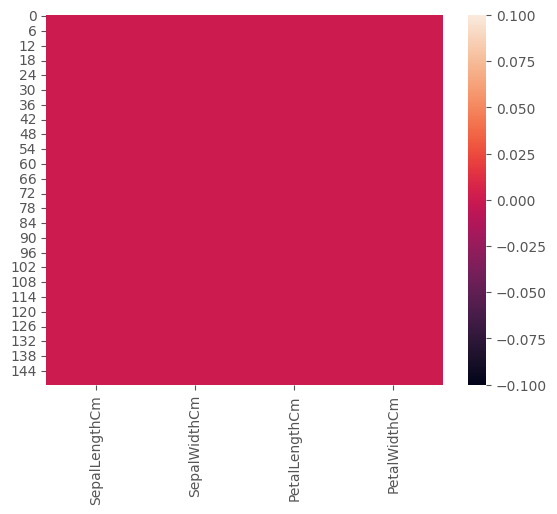

In [16]:
# To plot a graphic of missing values
import seaborn as sns
sns.heatmap(features.isna())

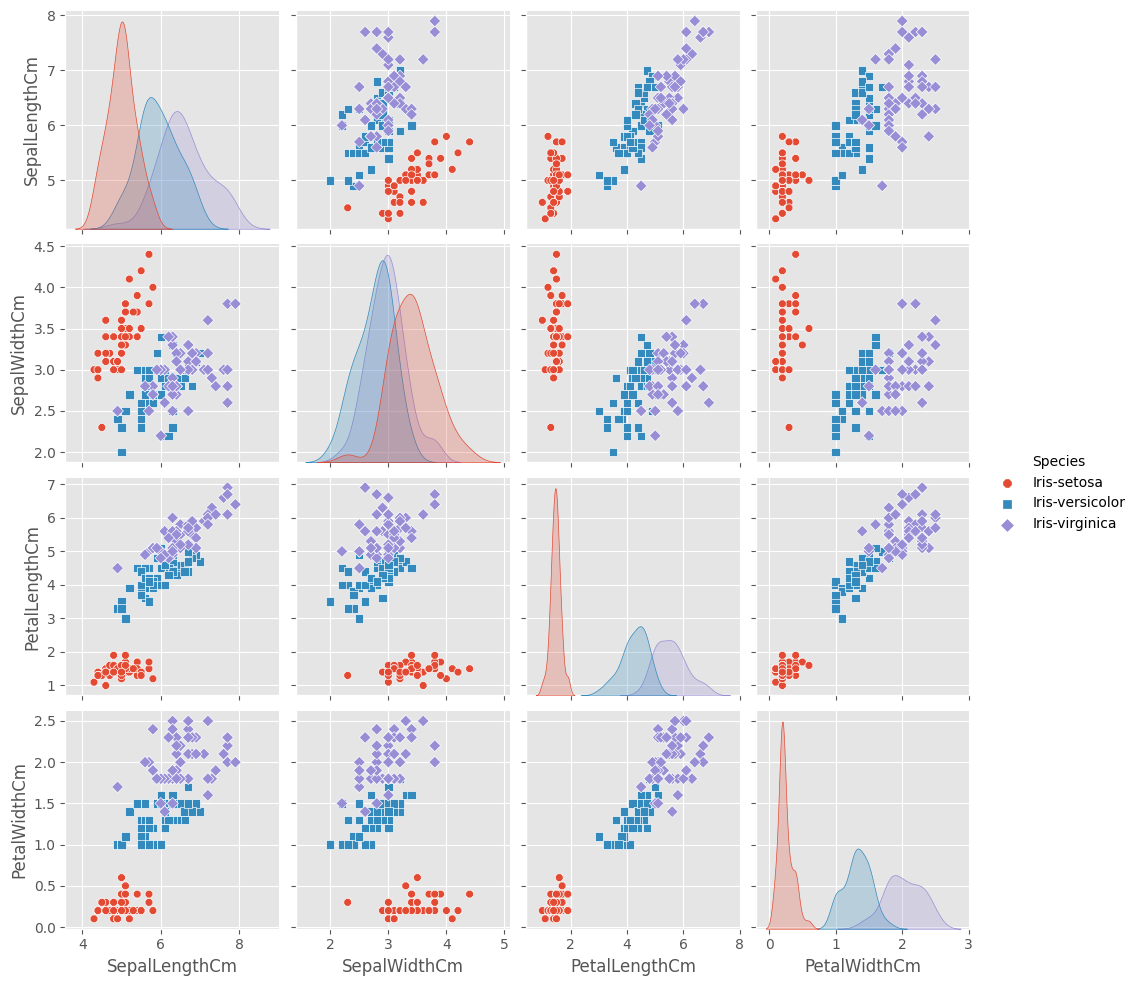

In [17]:
## Pairplots
sns.pairplot(df, hue= 'Species', height= 2.5, markers= ['8', 's', 'D'])

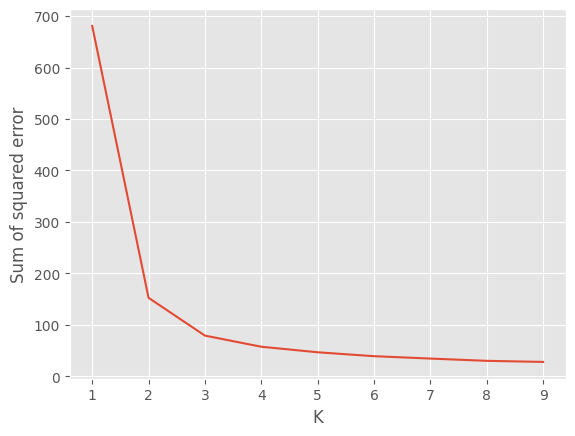

In [18]:
#clustering using kmeans
from sklearn.cluster import KMeans

#Elbow method 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(features)
    sse.append(km.inertia_) 


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
features = features.values
kmeans = KMeans(n_clusters = 3)


y_kmeans = kmeans.fit_predict(features)
y_kmeans



label.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [20]:
## Compare Actual vs Predicted
pd.crosstab(label, y_kmeans)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


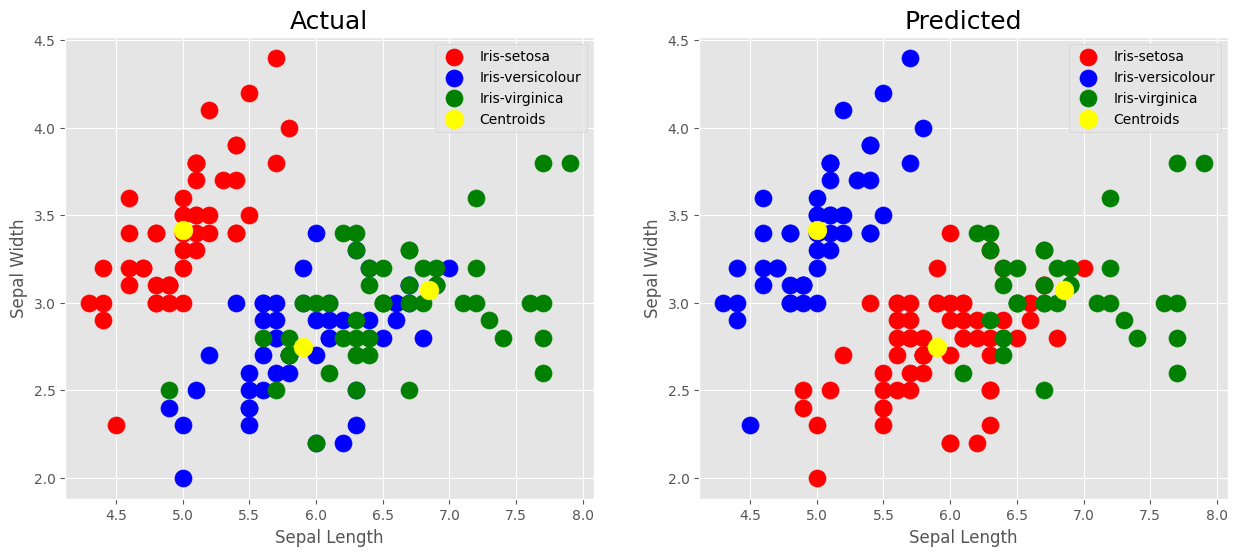

In [21]:
# Visualising the clusters
plt.figure(figsize= (15,6))

plt.subplot(1,2,1)
plt.scatter(features[label == 'Iris-setosa', 0], features[label == 'Iris-setosa', 1], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[label == 'Iris-versicolor', 0], features[label == 'Iris-versicolor', 1], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[label == 'Iris-virginica', 0], features[label == 'Iris-virginica', 1], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')

plt.title('Actual', fontsize= 18)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()



plt.subplot(1,2,2)
plt.scatter(features[y_kmeans == 0, 0], features[y_kmeans == 0, 1], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 0], features[y_kmeans == 1, 1], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 0], features[y_kmeans == 2, 1], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')

plt.title('Predicted', fontsize= 18)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


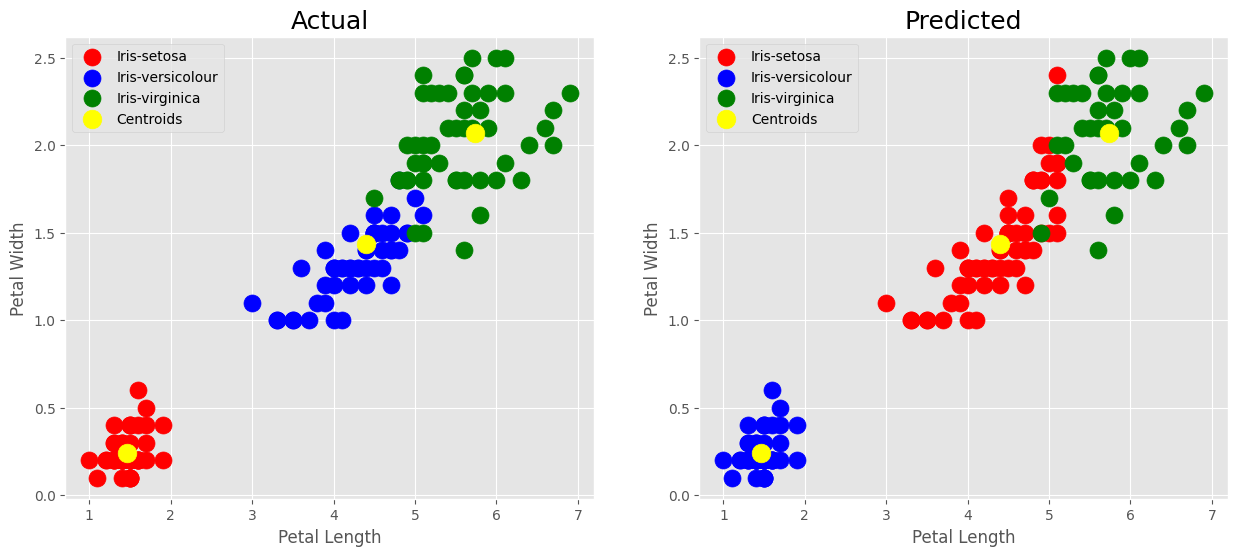

In [22]:

#Clustring based on Petal Length and Petal Weight.
# Visualising the clusters
plt.figure(figsize= (15,6))
plt.subplot(1,2,1)
plt.scatter(features[label == 'Iris-setosa', 2], features[label == 'Iris-setosa', 3], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[label == 'Iris-versicolor', 2], features[label == 'Iris-versicolor', 3], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[label == 'Iris-virginica', 2], features[label == 'Iris-virginica', 3], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 180, c = 'yellow', label = 'Centroids')

plt.title('Actual', fontsize= 18)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()



plt.subplot(1,2,2)
plt.scatter(features[y_kmeans == 0, 2], features[y_kmeans == 0, 3], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 1, 2], features[y_kmeans == 1, 3], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 2], features[y_kmeans == 2, 3], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 180, c = 'yellow', label = 'Centroids')

plt.title('Predicted', fontsize= 18)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()